### Формулювання задачі 17

In [5]:
#Для початку сформулюємо нашу задачу за допомогою функції LaTex
from IPython.display import display, Math

task_description = r"""
\text{Знайти чисельний розв'язок еліптичного рівняння математичної фізики (прогин плівки, стаціонарна теплопровідність):}
$$
5e^{-(x^2+2)(y^2+2)} \frac{\partial^2 U}{\partial x^2} + 3e^{-(x^2+1)(y^2+3)} \frac{\partial^2 U}{\partial y^2} - 10U = 3, \quad x \in [0, 1], \, y \in [-1, 2].
$$
\text{Граничні умови:}
$$
\frac{\partial U}{\partial x}\bigg|_{(0, y)} = 0, \quad U(1, y) = 1,
$$
$$
\frac{\partial U}{\partial x}\bigg|_{(x, -1)} = -1, \quad \frac{\partial U}{\partial x}\bigg|_{(x, 2)} = 1.
$$
\text{Внутрішні умови:}
$$
U = 10 \quad \text{на} \quad G: \left[ \frac{1}{3}, \frac{1}{2} \right] \times \left[ -\frac{1}{3}, \frac{3}{2} \right].
$$
"""

# Відображення умови задачі
display(Math(task_description))

<IPython.core.display.Math object>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

from block_thomas_method import BlockThomas
from adi_method import ADIMethod
from sor_method import SORMethod

### Визначення граничних умов

In [10]:
# Визначення параметрів для диференціальних рівнянь по осі абсцис x
x_params = {
    'func': lambda x, y: np.ones_like(x),  # Функція для коефіцієнта A(x, y)
    'interval': (0, 1),  # Інтервал для змінних по x
    'boundary_cond': [
        (1, 0, lambda y: 0),  # Ліва границя (умова Неймана): похідна дорівнює 0
        (0, 1, lambda y: np.ones_like(y))  # Права границя (умова Діріхле): значення дорівнює 1
    ],
    'grid_points': 100  # Кількість точок на сітці по x
}

# Визначення параметрів для диференціальних рівнянь по осі ординат y
y_params = {
    'func': lambda x, y: np.full_like(x, 3),  # Функція для коефіцієнта B(x, y)
    'interval': (-1, 2),  # Інтервал для змінних по y
    'boundary_cond': [
        (1, 0, lambda x: -1),  # Нижня границя (умова Неймана): похідна дорівнює -1
        (1, 0, lambda x: 1)  # Верхня границя (умова Неймана): похідна дорівнює 1
    ],
    'grid_points': 100  # Кількість точок на сітці по y
}

In [12]:
# Опис правої частини рівняння
C = lambda x, y: np.full_like(x, -10)  # Функція для коефіцієнта C(x, y)
G = lambda x, y: np.full_like(x, 3)  # Функція для правої частини рівняння G(x, y)

### Визначення внутрішніх умов

In [15]:
# Внутрішні умови
condition = {
    'area': [(1/3, 1/2), (-1/3, 3/2)],
    'value': 10
}
internal_conditions = [condition]

### Реалізація методу матричної прогонки (BlockThomas), поздовжньо-поперечної прогонки (ADI) та релаксації (SOR)

In [18]:
# Реалізація методу матричної прогонки (BlockThomas) з врахуванням внутрішніх умов
solver = BlockThomas(x_params, y_params, C, G, internal_conditions=[condition])
U_block = solver.solve()

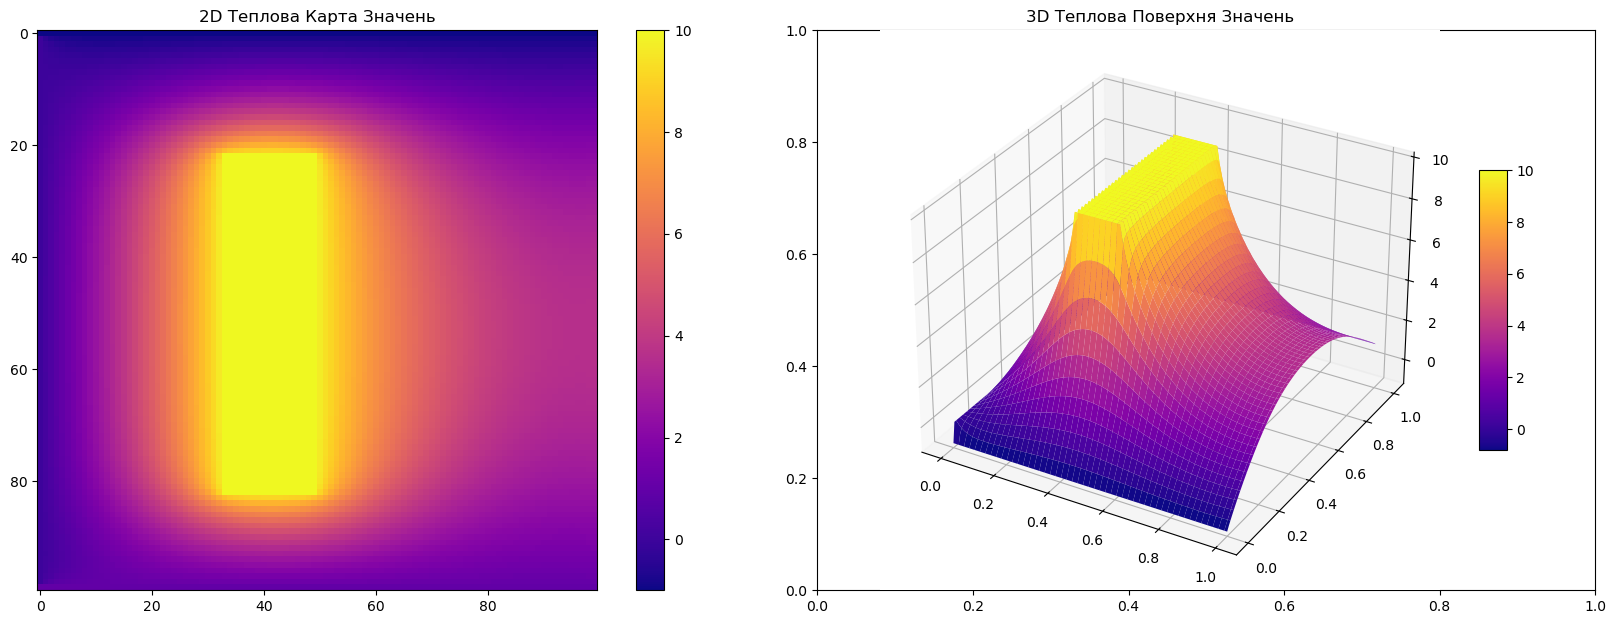

In [22]:
# Візуалізація результатів у 2D та 3D
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 2D теплове зображення
heatmap = axes[0].imshow(U_block, cmap='plasma')  
fig.colorbar(heatmap, ax=axes[0], orientation='vertical')
axes[0].set_title('2D Теплова Карта Значень')

# Налаштування для 3D графіка
ax_3d = fig.add_subplot(1, 2, 2, projection='3d')
x_values = np.linspace(0, 1, U_block.shape[1])  
y_values = np.linspace(0, 1, U_block.shape[0])
x_values, y_values = np.meshgrid(x_values, y_values)
surface_plot = ax_3d.plot_surface(x_values, y_values, U_block, cmap='plasma')  
fig.colorbar(surface_plot, ax=ax_3d, shrink=0.5, aspect=10)
ax_3d.set_title('3D Теплова Поверхня Значень')

# Збільшення відступів між графіками
fig.tight_layout(pad=5.0)
plt.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.15)
plt.show()

З отриманих результатів бачимо, що метод матричної прогонки з внутрішніми умовами успішно реалізоввно. На 2D тепловій карті відбувається плавний перехід з чітко виділеною прямокутною зоною посеред області, що є індикаторм того, що рівняння розв'язано правильно. Нижче реалізуємо методи ADI та SOR з врахуванням внутрішніх умов.

In [25]:
#Реалізація методу поздовжньо-поперечної прогонки (ADIMethod) з врахуванням внутрішніх умов
adi = ADIMethod(x_params, y_params, C, G, internal_conditions=[condition])
U_adi = adi.solve(max_iterations=20000, accuracy_threshold=1e-7)

In [27]:
#Реалізація методу релаксації (SORMethod) з врахуванням внутрішніх умов
relaxation = SORMethod(x_params, y_params, C, G, internal_conditions=[condition])
U_relax = relaxation.solve(max_iterations=20000, accuracy_threshold=1e-7)

### Візуалізація значень різних методів на одній системі координат

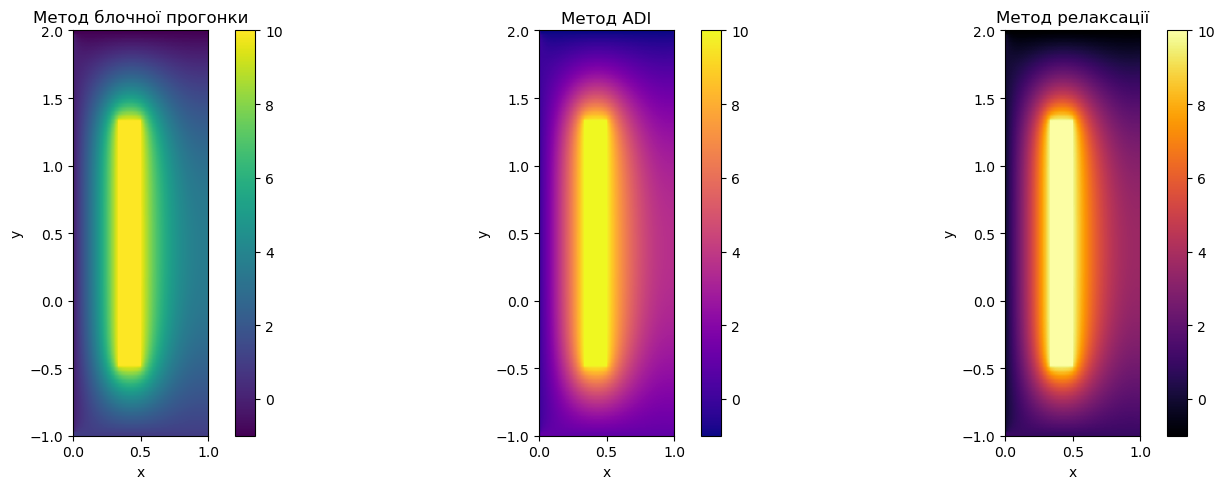

In [36]:
# Візуалізація результатів у 2D
plt.figure(figsize=(15, 5))

# Візуалізація значень методу блочної тридіагональної прогонки з врахуванням внутрішніх умов
plt.subplot(1, 3, 1)
plt.imshow(U_block, cmap='viridis', extent=[0, 1, -1, 2])
plt.colorbar()
plt.title("Метод блочної прогонки")
plt.xlabel("x")
plt.ylabel("y")

# Візуалізація значень методу поздовжньо-попереіної прогонки ADI з врахуванням внутрішніх умов
plt.subplot(1, 3, 2)
plt.imshow(U_adi, cmap='plasma', extent=[0, 1, -1, 2])
plt.colorbar()
plt.title("Метод ADI")
plt.xlabel("x")
plt.ylabel("y")

# Візуалізація значень методу релаксації з врахуванням внутрішніх умов
plt.subplot(1, 3, 3)
plt.imshow(U_relax, cmap='inferno', extent=[0, 1, -1, 2])
plt.colorbar()
plt.title("Метод релаксації")
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()

Отриманні результати на графіках вказують на те, що приблизно всі методи дають однаковий результат, обчислимо більше показників, щоб порівняти методи за часом їх виконання та точністю.

### Порівняння методів за часом виконання та точністю

In [40]:
# Вимірювання часу роботи методу матричної прогонки з врахуванням внутрішніх умов
work_time_matrix = time.time()
U_block = solver.solve()
work_time_matrix = time.time() - work_time_matrix
print(f"Час виконання методу матричної прогонки (з врахуванням внутрішніх умов): {work_time_matrix:.2f} сек")

# Вимірювання часу роботи методу ADI з врахуванням внутрішніх умов
work_time_adi = time.time()
U_adi = adi.solve(max_iterations=20000, accuracy_threshold=1e-7)
work_time_adi = time.time() - work_time_adi
print(f"Час виконання методу поздовжньо-поперечної прогонки (з врахуванням внутрішніх умов): {work_time_adi:.2f} сек")

# Вимірювання часу роботи методу SOR з врахуванням внутрішніх умов
work_time_relax = time.time()
U_relax = relaxation.solve(max_iterations=20000, accuracy_threshold=1e-7)
work_time_relax = time.time() - work_time_relax
print(f"Час виконання методу релаксації (з врахуванням внутрішніх умов): {work_time_relax:.2f} сек") 

Час виконання методу матричної прогонки (з врахуванням внутрішніх умов): 0.22 сек
Час виконання методу поздовжньо-поперечної прогонки (з врахуванням внутрішніх умов): 20.85 сек
Час виконання методу релаксації (з врахуванням внутрішніх умов): 26.28 сек


In [41]:
#Вимірювання точності чисельних методів (з врахуванням внутрішніх умов)
print("MAE(BlockThomas, ADIMethod) =", np.mean(np.abs(U_block - U_adi)))
print("MAE(BlockThomas, SORMethod) =", np.mean(np.abs(U_block - U_relax)))

MAE(BlockThomas, ADIMethod) = 0.00042220315994012604
MAE(BlockThomas, SORMethod) = 3.9628121012640935e-05


### Висновок

У файлі task_17_solved подано розв'язок еліптичного рівняння математичної фізики з фіктивними областями, сформувальованого у завданні 17. У ході роботи було реалізовано:
1. Програмно методи матричної прогонки (BlockThomas), поздовжньо-поперечної прогонки (ADI) та релаксації (SOR). При чому вибрано метод релаксації, а не метод Зейделя через можливість зручного налаштування релаксаційного критерія w (omega), що допомагає швидше досягти збіжності (критична умова для задач еліптичного рівняння).
2. Визначено чітко граничні умови. У задачі присутні умова Діріхле та умова Неймана
3. Визначено внутрішні умови у кожному з програмно реалізованих методів.
4. Візуальна реалізація методів практично співпадає, що є важливим індикатором правильного розв'язку рівняння.
5. Порівняння методів за швидкістю показали, що метод матричної прогонки значно випереджає два інших методи.
6. Крім того, методи також порівняли за параметром точності. Еталонним значенням вибрано матричної прогонки, оскільки цей метод є прямим методом розв'язання системи лінійних рівнянь. Він не використовує ітерацій і, при коректній реалізації, дає точний розв'язок з обмеженими похибками, пов'язаними лише з числовою точністю обчислень на машині. Відповідно за допомогою обчислення абсолютної похибки відносно методу матричної прогонки було встановлено, що метод релаксації ближче наближається до точного розв'язку, ніж метод поздовжньо-поперечної прогонки.

**Отже, найбільш ефективним по швидкості і точності розв'язку еліптичного рівняння (з фіктивними областями) є метод матричної прогонки (BlockThomas), компромісом між швидкістю і точністю є метод поздовжньо-поперечної прогонки ADI (менший час, але менш точний розв'язок) та метод релаксації SOR (довший час, але точніший розв'язок).**